In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Differentiability of a Piecewise Function at a Breakpoint

Consider the piecewise-defined function

$$
f(x) =
\begin{cases}
x^2, & x < 1, \\
2x - 1, & x \ge 1.
\end{cases}
$$

We analyze the continuity and differentiability of \( f \) at the breakpoint \( x = 1 \).

---

### 1. Continuity at \( x = 1 \)

The one-sided limits are

$$
\lim_{x \to 1^-} f(x) = \lim_{x \to 1^-} x^2 = 1,
$$

$$
\lim_{x \to 1^+} f(x) = \lim_{x \to 1^+} (2x - 1) = 1.
$$

Since

$$
f(1) = 2 \cdot 1 - 1 = 1,
$$

we have

$$
\lim_{x \to 1^-} f(x) = \lim_{x \to 1^+} f(x) = f(1),
$$

so \( f \) is **continuous at \( x = 1 \)**.

---

### 2. One-sided derivatives at \( x = 1 \)

**Left derivative:**

$$
\begin{aligned}
f'_-(1)
&= \lim_{h \to 0^-} \frac{f(1+h) - f(1)}{h} \\
&= \lim_{h \to 0^-} \frac{(1+h)^2 - 1}{h} \\
&= \lim_{h \to 0^-} (2 + h) \\
&= 2.
\end{aligned}
$$

**Right derivative:**

$$
\begin{aligned}
f'_+(1)
&= \lim_{h \to 0^+} \frac{f(1+h) - f(1)}{h} \\
&= \lim_{h \to 0^+} \frac{2(1+h) - 1 - 1}{h} \\
&= \lim_{h \to 0^+} 2 \\
&= 2.
\end{aligned}
$$

---

### 3. Differentiability conclusion

Since

$$
f'_-(1) = f'_+(1) = 2,
$$

the derivative exists at \( x = 1 \), and

$$
f'(1) = 2.
$$

---

### 4. Final statement

$$
\boxed{
\text{The function } f \text{ is continuous and differentiable at } x = 1.
}
$$

Geometrically, the two pieces connect smoothly with a common tangent at the breakpoint.


In [2]:
def f(x):
    return np.where(x < 1, x**2, 2*x - 1)


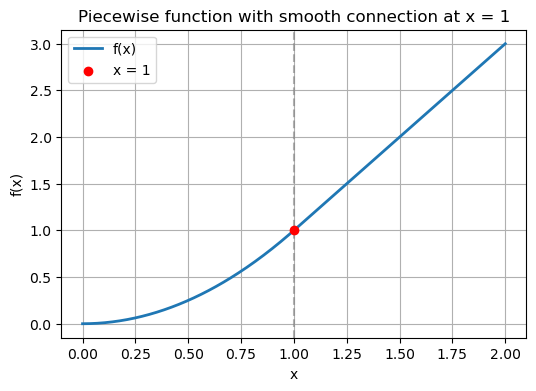

In [3]:
x = np.linspace(0, 2, 400)
y = f(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="f(x)", linewidth=2)

# Mark the breakpoint
plt.scatter([1], [1], color="red", zorder=3, label="x = 1")

plt.axvline(1, linestyle="--", color="gray", alpha=0.6)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Piecewise function with smooth connection at x = 1")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
h = 1e-6

left_derivative  = (f(1) - f(1 - h)) / h
right_derivative = (f(1 + h) - f(1)) / h

left_derivative, right_derivative


(np.float64(1.999999000079633), np.float64(1.9999999998354667))

In [7]:
h = 1e-6
central = (f(1 + h) - f(1 - h)) / (2*h)
central

np.float64(1.9999994999575499)

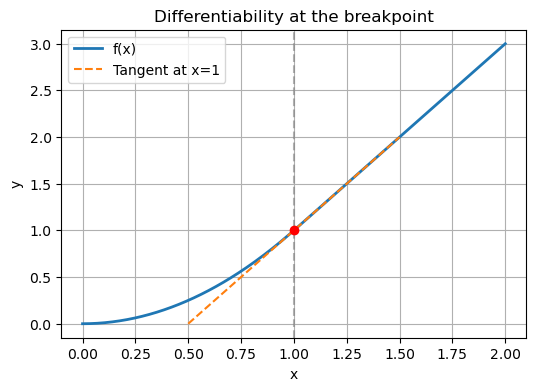

In [5]:
# Tangent line at x = 1
x_tan = np.linspace(0.5, 1.5, 100)
tangent = 2 * (x_tan - 1) + 1

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="f(x)", linewidth=2)
plt.plot(x_tan, tangent, linestyle="--", label="Tangent at x=1")

plt.scatter([1], [1], color="red", zorder=3)
plt.axvline(1, linestyle="--", color="gray", alpha=0.6)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Differentiability at the breakpoint")
plt.legend()
plt.grid(True)
plt.show()


## Numerical Differentiation at a Breakpoint: Forward, Central, and Complex-Step Methods

We consider the piecewise-defined function

$$
f(x) =
\begin{cases}
x^2, & x < 1, \\
2x - 1, & x \ge 1.
\end{cases}
$$

This function is continuous and differentiable at \( x = 1 \), with exact derivative

$$
f'(1) = 2.
$$

We now use this example to illustrate the behavior of different numerical differentiation methods as implemented in **`numdifftools`**.

---

## 1. Forward difference (`method="forward"`)

The forward difference approximation is

$$
D_h^{\text{fwd}} f(x)
= \frac{f(x+h) - f(x)}{h}.
$$

At \( x = 1 \):

$$
D_h^{\text{fwd}} f(1)
= \frac{f(1+h) - f(1)}{h}
= \frac{(2(1+h)-1) - 1}{h}
= 2.
$$

**Properties:**
- Uses values only from the **right side**
- First-order accurate: error \( \mathcal{O}(h) \)
- Works correctly here because the right derivative exists

---

## 2. Backward difference (`method="backward"`)

The backward difference approximation is

$$
D_h^{\text{bwd}} f(x)
= \frac{f(x) - f(x-h)}{h}.
$$

At \( x = 1 \):

$$
\begin{aligned}
D_h^{\text{bwd}} f(1)
&= \frac{1 - (1-h)^2}{h} \\
&= \frac{2h - h^2}{h} \\
&= 2 - h.
\end{aligned}
$$

As \( h \to 0 \), this converges to \( 2 \).

**Properties:**
- Uses values only from the **left side**
- First-order accurate
- Shows visible truncation error for finite \( h \)

---

## 3. Central difference (`method="central"`)

The central difference approximation is

$$
D_h^{\text{cen}} f(x)
= \frac{f(x+h) - f(x-h)}{2h}.
$$

At \( x = 1 \):

$$
\begin{aligned}
D_h^{\text{cen}} f(1)
&= \frac{(2(1+h)-1) - (1-h)^2}{2h} \\
&= \frac{2h + h^2}{2h} \\
&= 2 + \frac{h}{2}.
\end{aligned}
$$

**Properties:**
- Uses **both sides of the breakpoint**
- Second-order accurate: error \( \mathcal{O}(h^2) \)
- Works here only because the left and right derivatives coincide
- Would fail at a kink or cusp

---

## 4. Complex-step differentiation (`method="complex"`)

The complex-step method evaluates

$$
D^{\text{cs}} f(x)
= \frac{\operatorname{Im}\left[f(x + i h)\right]}{h}.
$$

For analytic functions, this avoids subtractive cancellation and gives machine-precision accuracy.

**Key limitation:**

The complex-step method requires the function to be **holomorphic** in a neighborhood of \( x \).

---

### Why this is problematic for piecewise functions

Our function contains:
- a branch condition \( x < 1 \) vs. \( x \ge 1 \)
- a non-analytic control flow

When evaluating \( f(1 + i h) \), the comparison \( x < 1 \) is **not well-defined** for complex numbers.

As a result:
- `numdifftools` may silently choose one branch
- or return an incorrect derivative
- or fail entirely, depending on implementation

**Conclusion:**
\[
\boxed{
\text{Complex-step differentiation is \emph{not mathematically valid} for piecewise-defined functions.}
}
\]

---

## 5. Multicomplex-step (`method="multicomplex"`)

The multicomplex method extends the complex-step idea to higher-order derivatives using nested imaginary units.

**Requirements:**
- The function must be fully analytic
- No branching, conditionals, or absolute values

Since the present function is piecewise-defined, the multicomplex method is **not applicable**.

---

## 6. Summary comparison

| Method | Uses left | Uses right | Order | Valid at breakpoint? | Notes |
|------|----------|-----------|-------|----------------------|------|
| Forward | ✗ | ✓ | $$ \mathcal{O}(h) $$ | ✓ | Right derivative |
| Backward | ✓ | ✗ | $$ \mathcal{O}(h) $$ | ✓ | Left derivative |
| Central | ✓ | ✓ | $$ \mathcal{O}(h^2) $$ | ✓ (only if smooth) | Fails at kinks |
| Complex-step | — | — | Machine precision | ✗ | Requires analyticity |
| Multicomplex | — | — | Very high | ✗ | Analytic only |

---

## 7. Sum upp

Even when a piecewise function is differentiable in the classical sense,

$$
f'_-(x) = f'_+(x),
$$

**not all numerical differentiation methods are valid**.

$$
\boxed{
\text{Differentiability does not imply analyticity.}
}
$$

This distinction explains why `numdifftools` behaves differently across methods for the same function.
